## Tune alpha hyperparameter for UCB algorithm in this notebook

In [3]:
import os
os.chdir('../..')
os.getcwd()

'/Users/sbokupripeku/git/work/examples/costly_nonstationary_bandits'

In [4]:
%load_ext autoreload
%autoreload 2

import pickle
import matplotlib.pyplot as plt

import algorithms
import costs
import evaluation
import dataset
from plotting.average_ctr import get_average_ctr_plot

In [5]:
%%time
import gc

with open("dataset/r6b/subsample/data_10.pickle", "rb") as f:
    gc.disable()
    data = pickle.load(f)
    gc.enable()

CPU times: user 3.17 s, sys: 978 ms, total: 4.15 s
Wall time: 12.2 s


In [6]:
def plot_ctrs(ctr_dict):
    fig, ax = plt.subplots(1,1, figsize=(10, 5));
    
    N = 40
    
    for label, ctr in ctr_dict.items():
        ax.plot(ctr[N:], label=label)
    ax.set_xlabel('Trial')
    ax.set_ylabel('CTR')
    ax.set_title('Evaluation without costs')

    plt.legend();
    plt.show();

In [16]:
ctr_dict = {}
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for alpha in alphas:
    ucb_alg = algorithms.UCB1(
        n_arms=data.n_arms,
        alpha=alpha,
    )
    ctr = evaluation.evaluate(ucb_alg, data, stop_after=None)
    ctr_dict[f"UCB1 alpha={alpha}"] = ctr

UCB1 (α=0.1) with ZeroCosts
Average reward: 0.0683
Execution time: 3.7m
UCB1 (α=0.2) with ZeroCosts
Average reward: 0.0665
Execution time: 4.7m
UCB1 (α=0.3) with ZeroCosts
Average reward: 0.063
Execution time: 3.7m
UCB1 (α=0.4) with ZeroCosts
Average reward: 0.0614
Execution time: 3.7m
UCB1 (α=0.5) with ZeroCosts
Average reward: 0.0604
Execution time: 3.7m
UCB1 (α=0.6) with ZeroCosts
Average reward: 0.0582
Execution time: 3.7m
UCB1 (α=0.7) with ZeroCosts
Average reward: 0.0583
Execution time: 3.7m
UCB1 (α=0.8) with ZeroCosts
Average reward: 0.0578
Execution time: 3.8m


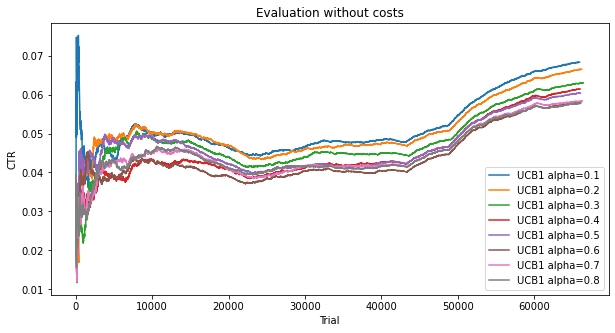

In [17]:
plot_ctrs(ctr_dict)

In [18]:
ctr_dict = {}
alphas = [0.05, 0.06, 0.07, 0.08, 0.09, 0.11, 0.12, 0.13, 0.14, 0.15]
for alpha in alphas:
    ucb_alg = algorithms.UCB1(
        n_arms=data.n_arms,
        alpha=alpha,
    )
    ctr = evaluation.evaluate(ucb_alg, data, stop_after=None)
    ctr_dict[f"UCB1 alpha={alpha}"] = ctr

UCB1 (α=0.05) with ZeroCosts
Average reward: 0.0737
Execution time: 3.7m
UCB1 (α=0.06) with ZeroCosts
Average reward: 0.0726
Execution time: 3.8m
UCB1 (α=0.07) with ZeroCosts
Average reward: 0.0708
Execution time: 3.8m
UCB1 (α=0.08) with ZeroCosts
Average reward: 0.072
Execution time: 3.8m
UCB1 (α=0.09) with ZeroCosts
Average reward: 0.0706
Execution time: 3.8m
UCB1 (α=0.11) with ZeroCosts
Average reward: 0.0688
Execution time: 3.8m
UCB1 (α=0.12) with ZeroCosts
Average reward: 0.0694
Execution time: 3.8m
UCB1 (α=0.13) with ZeroCosts
Average reward: 0.0692
Execution time: 3.8m
UCB1 (α=0.14) with ZeroCosts
Average reward: 0.0669
Execution time: 3.8m
UCB1 (α=0.15) with ZeroCosts
Average reward: 0.0688
Execution time: 3.8m


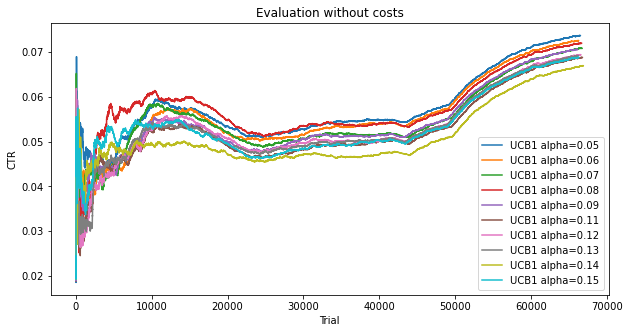

In [19]:
plot_ctrs(ctr_dict)

In [20]:
ctr_dict = {}
alphas = [0.01, 0.02, 0.03, 0.04]
for alpha in alphas:
    ucb_alg = algorithms.UCB1(
        n_arms=data.n_arms,
        alpha=alpha,
    )
    ctr = evaluation.evaluate(ucb_alg, data, stop_after=None)
    ctr_dict[f"UCB1 alpha={alpha}"] = ctr

UCB1 (α=0.01) with ZeroCosts
Average reward: 0.0791
Execution time: 3.8m
UCB1 (α=0.02) with ZeroCosts
Average reward: 0.0729
Execution time: 3.9m
UCB1 (α=0.03) with ZeroCosts
Average reward: 0.0769
Execution time: 3.9m
UCB1 (α=0.04) with ZeroCosts
Average reward: 0.0752
Execution time: 3.8m


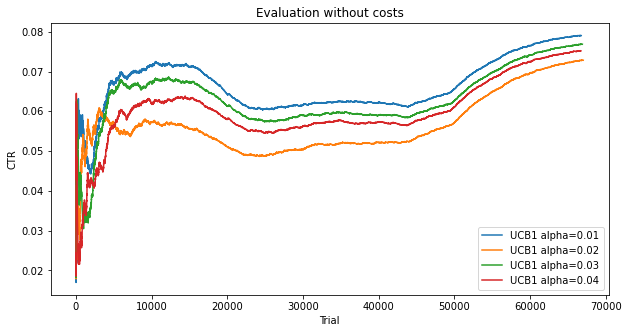

In [21]:
plot_ctrs(ctr_dict)

### Now check LinUCB with smaller alpha values

In [13]:
ctr_dict = {}
alphas = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05]
for alpha in alphas:
    linucb_alg = algorithms.LinUCB(
        context_dimension=len(data.events[0].user_features),
        n_arms=data.n_arms,
        alpha=alpha,
    )
    ctr = evaluation.evaluate(linucb_alg, data, stop_after=None)
    ctr_dict[f"LinUCB {alpha}"] = ctr

LinUCB (alpha=0.005 with ZeroCosts
Average reward: 0.0541
Execution time: 14.4m
LinUCB (alpha=0.01 with ZeroCosts
Average reward: 0.0631
Execution time: 14.3m
LinUCB (alpha=0.02 with ZeroCosts
Average reward: 0.0622
Execution time: 15.9m
LinUCB (alpha=0.03 with ZeroCosts
Average reward: 0.0685
Execution time: 14.2m
LinUCB (alpha=0.04 with ZeroCosts
Average reward: 0.0589
Execution time: 14.4m
LinUCB (alpha=0.05 with ZeroCosts
Average reward: 0.0639
Execution time: 14.3m


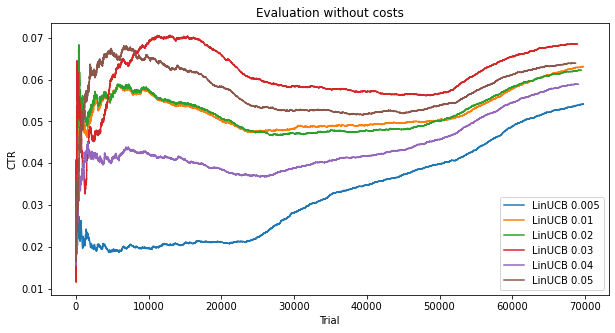

In [14]:
plot_ctrs(ctr_dict)

In [15]:
ctr_list = []

In [16]:
def run_ps_linucb(params):
    data, alpha, delta, omega = params
    ps_linucb = algorithms.PSLinUCB(
        context_dimension=len(data.events[0].user_features),
        n_arms=data.n_arms,
        alpha=alpha,
        omega=omega,
        delta=delta
    )
    ctr_pslinucb = evaluation.evaluate(ps_linucb, data, stop_after=None)
    param_str = f"PS-LinUCB a={alpha} o={omega} d={delta}"

    return param_str, ctr_pslinucb

In [17]:
alphas = [0.005, 0.01, 0.02, 0.03, 0.04]
omegas = [1000]
deltas = [0.03, 0.04, 0.042, 0.043]

params = []
for alpha in alphas:
    for omega in omegas:
        for delta in deltas:
            params.append((data, alpha, delta, omega))

In [18]:
for param_tuple in params:
    params_str, ctr_pslinucb = run_ps_linucb(param_tuple)
    ctr_list.append((params_str, ctr_pslinucb))

PSLinUCB (alpha=0.005, omega=1000, delta=0.03) with ZeroCosts
Average reward: 0.053
Execution time: 15.1m
PSLinUCB (alpha=0.005, omega=1000, delta=0.04) with ZeroCosts
Average reward: 0.0517
Execution time: 15.3m
PSLinUCB (alpha=0.005, omega=1000, delta=0.042) with ZeroCosts
Average reward: 0.0543
Execution time: 15.1m
PSLinUCB (alpha=0.005, omega=1000, delta=0.043) with ZeroCosts
Average reward: 0.0534
Execution time: 15.2m
PSLinUCB (alpha=0.01, omega=1000, delta=0.03) with ZeroCosts
Average reward: 0.0632
Execution time: 15.0m
PSLinUCB (alpha=0.01, omega=1000, delta=0.04) with ZeroCosts
Average reward: 0.0618
Execution time: 14.9m
PSLinUCB (alpha=0.01, omega=1000, delta=0.042) with ZeroCosts
Average reward: 0.0639
Execution time: 15.1m
PSLinUCB (alpha=0.01, omega=1000, delta=0.043) with ZeroCosts
Average reward: 0.0631
Execution time: 15.1m
PSLinUCB (alpha=0.02, omega=1000, delta=0.03) with ZeroCosts
Average reward: 0.0614
Execution time: 15.0m
PSLinUCB (alpha=0.02, omega=1000, delta

In [19]:
import pickle
with open('ctr_list_ps_linucb_small.pickle', 'wb') as f:
    pickle.dump(ctr_list, f)

In [20]:
last_ctrs = [(name, ctr[-1]) for name, ctr in ctr_list]

In [21]:
sorted(last_ctrs, key=lambda x:x[1])[-15:]

[('PS-LinUCB a=0.04 o=1000 d=0.043', 0.05664693023727145),
 ('PS-LinUCB a=0.04 o=1000 d=0.042', 0.057557896557190416),
 ('PS-LinUCB a=0.04 o=1000 d=0.04', 0.058421928111665584),
 ('PS-LinUCB a=0.02 o=1000 d=0.03', 0.06136154023518561),
 ('PS-LinUCB a=0.02 o=1000 d=0.042', 0.06145951945113075),
 ('PS-LinUCB a=0.01 o=1000 d=0.04', 0.06180241543128613),
 ('PS-LinUCB a=0.01 o=1000 d=0.043', 0.06305714285714285),
 ('PS-LinUCB a=0.01 o=1000 d=0.03', 0.06315744278906016),
 ('PS-LinUCB a=0.01 o=1000 d=0.042', 0.06388968276650471),
 ('PS-LinUCB a=0.03 o=1000 d=0.043', 0.06408328513591671),
 ('PS-LinUCB a=0.02 o=1000 d=0.04', 0.06473057581271402),
 ('PS-LinUCB a=0.02 o=1000 d=0.043', 0.0654979827999598),
 ('PS-LinUCB a=0.03 o=1000 d=0.042', 0.06638007150404562),
 ('PS-LinUCB a=0.03 o=1000 d=0.04', 0.06689962156911076),
 ('PS-LinUCB a=0.03 o=1000 d=0.03', 0.06835608480975894)]

In [22]:
ps_ctr_dict = dict(sorted(ctr_list, key=lambda x:x[1][-1])[-5:])

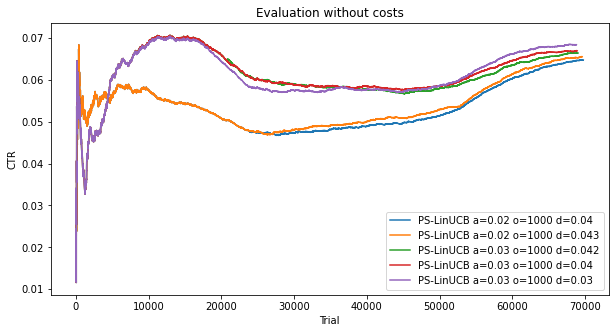

In [23]:
plot_ctrs(ps_ctr_dict)